In [1]:
%matplotlib inline

import csv
import matplotlib.pyplot as plt

In [2]:
burrito_data = []
with open('burritodata_092616.csv', 'r') as csvfile:
     b_data = csv.reader(csvfile)
     for row in b_data:
         burrito_data.append(row)

In [3]:
y = []
for i in burrito_data[1:]:
    try:
        y.append(float(i[7])/float(i[6]) - 1)
    except ValueError:
        pass

In [4]:
x = range(len(y))

In [5]:
y = sorted(y)

Text(0.5,1,u'Difference between Google and Yelp Scores of Burritos in San Diego')

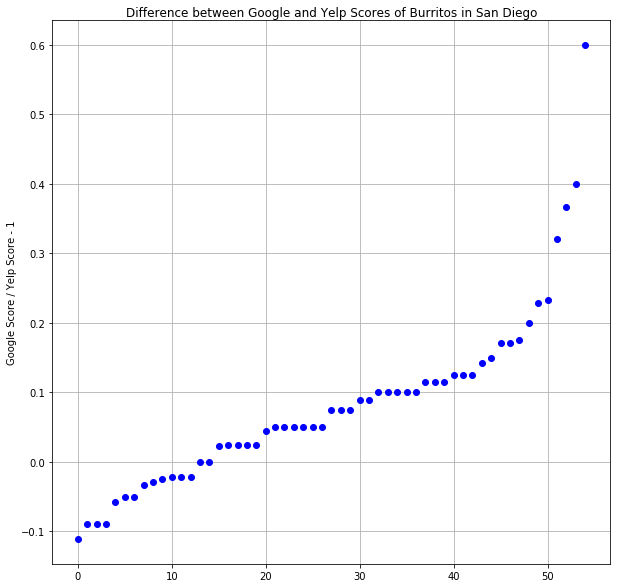

In [6]:
plt.figure(figsize=(10,10))
plt.plot(x, y, 'bo')
plt.grid()
plt.ylabel('Google Score / Yelp Score - 1')
plt.title('Zeroed Difference between Google and Yelp Scores of Burritos in San Diego')

In [7]:
neighborhood_scores = {}
for i in burrito_data[1:]:
    try:
        neighborhood_scores[i[3]][0] += float(i[7]) + float(i[6])
        neighborhood_scores[i[3]][1] += 2
        neighborhood_scores[i[3]][2] += float(i[23])
        neighborhood_scores[i[3]][3] += 1
    except (KeyError, ValueError):
        try:
            neighborhood_scores[i[3]] = [float(i[7]) + float(i[6]), 2, float(i[23]), 1]
        except ValueError:
            pass

In [8]:
for i in neighborhood_scores.keys():
    x = neighborhood_scores[i]
    neighborhood_scores[i] = [x[0] / x[1], x[2] / float(x[3])]

In [9]:
import operator
z = sorted(neighborhood_scores.items(), key=operator.itemgetter(1))

In [10]:
x = []
y1 = []
y2 = []
for i in z:
    x.append(i[0])
    y1.append(i[1][0])
    y2.append(i[1][1])

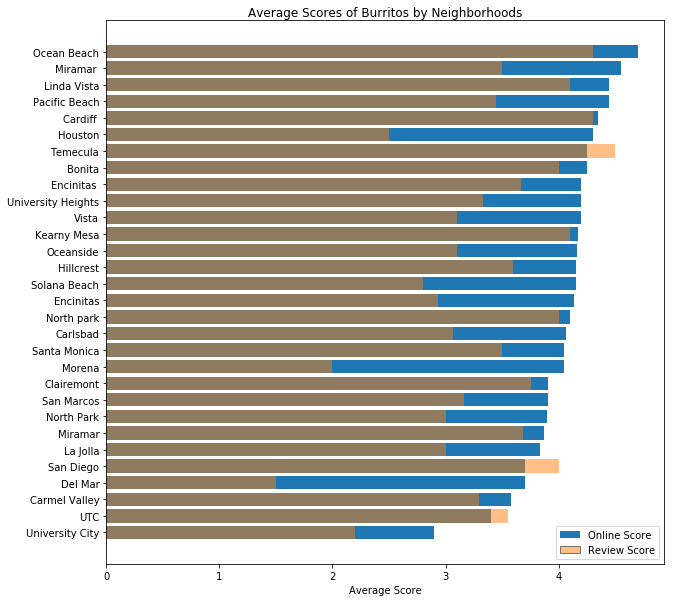

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
y_pos = range(len(x))
plt.barh(y_pos, y1, align='center', label='Online Score')
plt.barh(y_pos, y2, align='center', alpha=0.5, label='Review Score')
plt.yticks(y_pos, x)
plt.xlabel('Average Score')
plt.title('Average Scores of Burritos by Neighborhoods')
plt.legend()

In [12]:
import seaborn as sns

In [13]:
y = []
for i in burrito_data[1:]:
    try:
        y.append(float(i[23])/float(i[10]))
    except ValueError:
        pass

Text(0.5,1,u'Distribution of Normalised Burrito Scores')

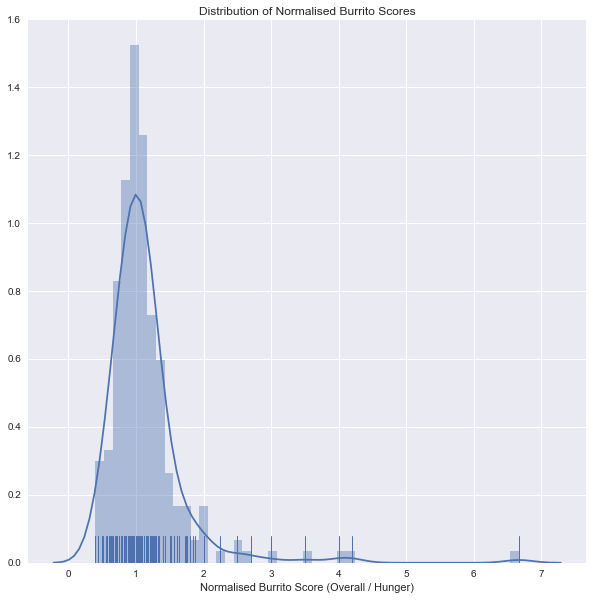

In [16]:
plt.figure(figsize=(10,10))
sns.distplot(y, rug=True)
plt.xlabel('Normalised Burrito Score (Overall / Hunger)')
plt.title('Distribution of Normalised Burrito Scores')